In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Image = cv2.imread('test.jpg')
RGB_image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
GrayImage = cv2.cvtColor(RGB_image, cv2.COLOR_RGB2GRAY)

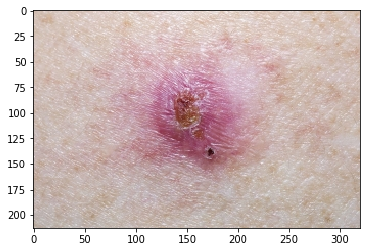

In [3]:
plt.imshow(RGB_image)

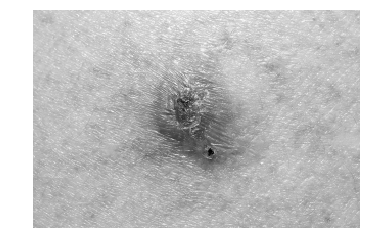

In [4]:
plt.axis('off')
plt.imshow(GrayImage,cmap='gray')

Bluring the image

In [5]:
blur = cv2.GaussianBlur(GrayImage, (5, 5), 0)

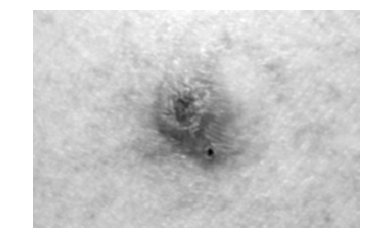

In [6]:
plt.axis('off')
plt.imshow(blur,cmap='gray')

Binarizing the file

(thresh, BinaryImage) = cv2.threshold(blur, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [7]:
thresh = 127
BinaryImage = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)[1]

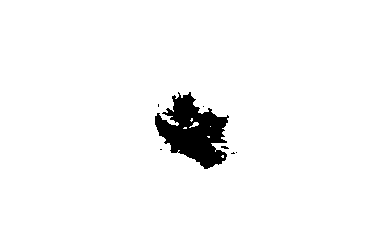

In [8]:
plt.axis('off')
plt.imshow(BinaryImage,cmap='gray')

In [9]:
mask_inv = cv2.bitwise_not(BinaryImage)

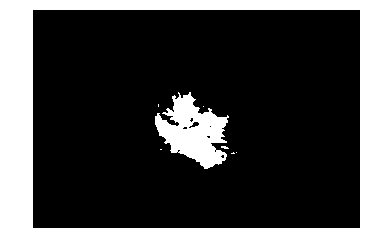

In [10]:
plt.axis('off')
plt.imshow(mask_inv,cmap='gray')

In [11]:
# find contours
(_, contours, _) = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [12]:
# drawing contours
contoured_image = cv2.drawContours(RGB_image, contours, -1, (255, 0, 0), 2)

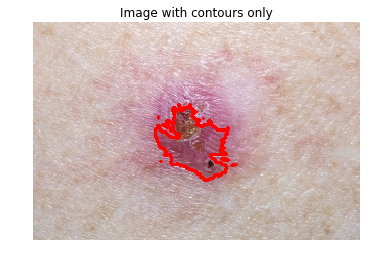

In [13]:
plt.title("Image with contours only")
plt.axis('off')
plt.imshow(contoured_image)

In [14]:
#bounding rectangles
for c in contours:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    boxed = cv2.rectangle(RGB_image,(x,y),(x+w,y+h),(0,255,0),2)

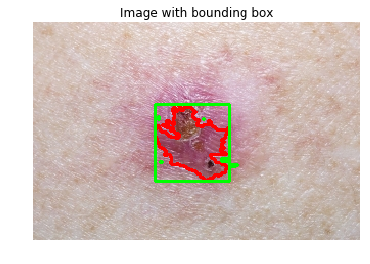

In [15]:
plt.title("Image with bounding box");
plt.axis('off')
plt.imshow(boxed)